In [2]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

In [6]:
import os
os.chdir('/Users/Khushi Patel/ML/LogReg')
print(os.getcwd())

C:\Users\Khushi Patel\ML\LogReg


In [10]:
df=pd.read_csv("HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [14]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [18]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (3008, 10)


In [20]:
# df = df.drop_duplicates()
# df.shape

In [22]:
# print(df.isnull().sum())

In [24]:
left = df[df.left==1]
left.shape

(3571, 10)

In [28]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [34]:
from sklearn.preprocessing import OrdinalEncoder

salary_order = ['low', 'medium', 'high']
oe = OrdinalEncoder(categories=[salary_order], handle_unknown='use_encoded_value', unknown_value=-1)
df['salary'] = oe.fit_transform(df[['salary']])

df = pd.get_dummies(df, columns=['Department'], drop_first=True)

df = df.apply(pd.to_numeric, errors='coerce')

In [36]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
left,,,,,,,,,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,0.650945,0.058278,0.049265,0.045852,0.047165,0.057315,0.061603,0.273539,0.146482,0.177021
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,0.414730,0.033884,0.057127,0.060207,0.025483,0.056847,0.055447,0.283954,0.155419,0.195183


<Axes: xlabel='salary'>

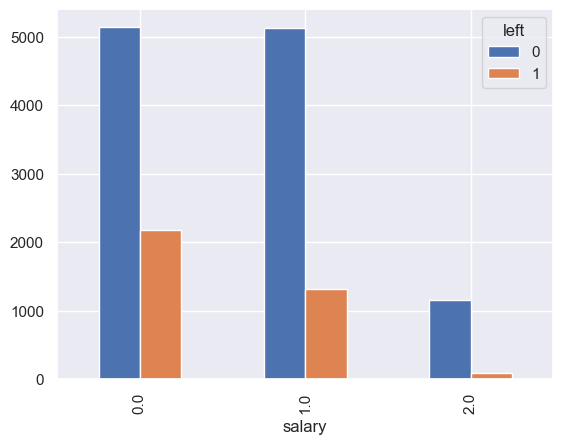

In [38]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

In [132]:
x = df[['satisfaction_level','number_project','average_montly_hours','promotion_last_5years','salary']]
x.head()

,satisfaction_level,number_project,average_montly_hours,promotion_last_5years,salary
0,0.38,2,157,0,0.0
1,0.80,5,262,0,1.0
2,0.11,7,272,0,1.0
3,0.72,5,223,0,0.0
4,0.37,2,159,0,0.0


In [136]:
y=df.left
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [144]:
from sklearn.model_selection import train_test_split
xa,xb,ya,yb = train_test_split(x,y,test_size=0.3)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xa,ya)

LogisticRegression()

In [148]:
model.predict(xb)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [152]:
model.score(xb,yb)

0.7884444444444444